# Global Superstore Data Analysis Project
This project analyzes sales, profit, and customer behavior using the Global Superstore dataset. Insights are drawn through EDA, visualization, and interactive dashboards.


In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px
%matplotlib inline


df = pd.read_excel("C:\\Users\\Riya\\Downloads\\archive (10)\\Global Superstore.xls")


## 👀 Initial Data Preview
We use `df.head()`, `df.info()`,`df.shape`
 and `df.describe()` to understand the dataset.


In [451]:
df.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,310",7,0,762,934,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709",9,0,-289,924,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175",9,0,920,915,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,893",5,0,-97,910,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,833",8,0,312,903,Critical


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [453]:
df.shape

(51290, 24)

In [454]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290",51290,51290,"9,994","51,290","51,290","51,290","51,290","51,290"
mean,"25,646",2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,"55,190",246,3,0,29,26
min,1,2011-01-01 00:00:00,2011-01-03 00:00:00,"1,040",0,1,0,"-6,600",0
25%,"12,823",2012-06-19 00:00:00,2012-06-23 00:00:00,"23,223",31,2,0,0,3
50%,"25,646",2013-07-08 00:00:00,2013-07-12 00:00:00,"56,430",85,3,0,9,8
75%,"38,468",2014-05-22 00:00:00,2014-05-26 00:00:00,"90,008",251,5,0,37,24
max,"51,290",2014-12-31 00:00:00,2015-01-07 00:00:00,"99,301","22,638",14,1,"8,400",934
std,"14,806",NaN,NaN,"32,064",488,2,0,174,57


## 🔧 Data Cleaning Summary (Day 1)

- Dropped 10 duplicate rows based on `Order ID`, `Product Name`, and `Quantity`
- Removed unnecessary columns: `Row ID`, `Postal Code`
- Renamed columns to lowercase and underscore-separated
- Checked for missing values and confirmed data integrity


In [455]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [456]:
df_cleaned = df.drop(columns=[
    'Row ID', 
    'Customer Name', 
    'Postal Code', 
    'Product ID'
])


In [457]:
df_cleaned.shape


(51290, 20)

In [458]:
df_cleaned.info(21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Segment         51290 non-null  object        
 6   City            51290 non-null  object        
 7   State           51290 non-null  object        
 8   Country         51290 non-null  object        
 9   Market          51290 non-null  object        
 10  Region          51290 non-null  object        
 11  Category        51290 non-null  object        
 12  Sub-Category    51290 non-null  object        
 13  Product Name    51290 non-null  object        
 14  Sales           51290 non-null  float64       
 15  Qu

In [459]:
df_cleaned.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,310",7,0,762,934,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709",9,0,-289,924,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175",9,0,920,915,Medium
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless","2,893",5,0,-97,910,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,833",8,0,312,903,Critical


In [460]:
df_cleaned[['Sales','Quantity','Discount','Profit','Shipping Cost']].describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290","51,290","51,290","51,290","51,290"
mean,246,3,0,29,26
std,488,2,0,174,57
min,0,1,0,"-6,600",0
25%,31,2,0,0,3
50%,85,3,0,9,8
75%,251,5,0,37,24
max,"22,638",14,1,"8,400",934


In [461]:
df_cleaned.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [462]:

df.duplicated().sum()
df_cleaned.shape


(51290, 20)

In [463]:
df_cleaned.duplicated(['Order ID', 'Product Name', 'Quantity','Order Date']).sum()


np.int64(9)

In [464]:
df_cleaned[df_cleaned.duplicated(subset=['Order ID', 'Product Name', 'Quantity','Order Date'], keep=False)]


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
4491,IN-2012-38657,2012-11-05,2012-11-06,First Class,RM-19375,Consumer,Bangkok,Bangkok,Thailand,APAC,Southeast Asia,Furniture,Chairs,"Office Star Steel Folding Chair, Adjustable",344,5,0,89,73,Medium
4816,MX-2012-137561,2012-12-03,2012-12-07,Standard Class,LS-17200,Corporate,Rancagua,O'Higgins,Chile,LATAM,South,Furniture,Chairs,"SAFCO Executive Leather Armchair, Red",615,2,0,12,69,Medium
6056,IN-2012-38657,2012-11-05,2012-11-06,First Class,RM-19375,Consumer,Bangkok,Bangkok,Thailand,APAC,Southeast Asia,Furniture,Chairs,"Office Star Steel Folding Chair, Adjustable",344,5,0,89,56,Medium
6163,MX-2012-137561,2012-12-03,2012-12-07,Standard Class,LS-17200,Corporate,Rancagua,O'Higgins,Chile,LATAM,South,Furniture,Chairs,"SAFCO Executive Leather Armchair, Red",615,2,0,12,55,Medium
14056,US-2011-150119,2011-04-23,2011-04-27,Standard Class,LB-16795,Home Office,Columbus,Ohio,United States,US,East,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281,2,0,-12,22,Medium
27583,IN-2013-66265,2013-06-06,2013-06-06,Same Day,SF-20200,Consumer,Newcastle,New South Wales,Australia,APAC,Oceania,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",23,1,0,10,7,Medium
30159,AG-2014-4840,2014-08-20,2014-08-25,Standard Class,CD-2790,Home Office,Oran,Oran,Algeria,Africa,Africa,Technology,Accessories,"Memorex Mouse, USB",57,2,0,11,5,High
34084,ES-2013-2926991,2013-06-14,2013-06-21,Standard Class,SR-20740,Home Office,Madrid,Madrid,Spain,EU,South,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",84,3,0,28,4,Medium
35429,US-2011-150119,2011-04-23,2011-04-27,Standard Class,LB-16795,Home Office,Columbus,Ohio,United States,US,East,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281,2,0,-12,3,Medium
36498,ES-2013-2926991,2013-06-14,2013-06-21,Standard Class,SR-20740,Home Office,Madrid,Madrid,Spain,EU,South,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",84,3,0,28,3,Medium


In [465]:
df_cleaned = df_cleaned.drop_duplicates(['Order ID', 'Product Name', 'Quantity'], keep='first')


In [466]:
df_cleaned.shape

(51280, 20)

In [467]:
df_cleaned.duplicated(['Order ID', 'Product Name', 'Quantity','Order Date']).sum()

np.int64(0)

In [468]:
df_cleaned.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,310",7,0,762,934,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709",9,0,-289,924,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175",9,0,920,915,Medium
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless","2,893",5,0,-97,910,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,833",8,0,312,903,Critical


In [469]:
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')


In [470]:
df_cleaned.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'segment', 'city', 'state', 'country', 'market', 'region', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [471]:
df_cleaned.to_csv("cleaned_global_superstore.csv", index=False)


# 🧼 Day 1 – Data Cleaning & Initial Audit (Global Superstore Dataset)

In this step, we prepare the dataset for analysis by cleaning the structure, ensuring consistency, and removing any unnecessary noise in the data.

---

## ✅ Steps Performed:

1. **Previewed the dataset**
   - Used `.head()`, `.tail()`, `.shape`, `.columns`, and `.info()` to understand the structure.
   - Verified data types, number of rows/columns, and general health of the data.

2. **Descriptive Statistics**
   - Used `.describe()` to understand the central tendencies and spread of numerical features like `Sales`, `Profit`, `Discount`, and `Quantity`.

3. **Dropped Duplicates**
   - Found 10 exact duplicate rows based on `Order ID`, `Product Name`, and `Quantity`.
   - Dropped them using `drop_duplicates()` to avoid overcounting.

4. **Removed Unnecessary Columns**
   - Dropped columns like `Row ID` and `Postal Code` as they don’t contribute to business insights.

5. **Cleaned Column Names**
   - Stripped spaces and converted all column names to lowercase with underscores for consistency and easier access.
   - Example: `Order Date` → `order_date`, `Ship Mode` → `ship_mode`

6. **Checked for Missing Values**
   - Ran `isnull().sum()` to detect missing data.
   - No major null values were found. (Or: Will handle in later steps if necessary.)

7. **Converted Date Columns**
   - Converted `order_date` and `ship_date` columns to proper `datetime` format using `pd.to_datetime()`.

8. **Saved the Cleaned Dataset**
   - Saved a cleaned version as `cleaned_global_superstore.csv` for Day 2 (EDA).

---

## 📌 Next Step:
We’ll begin **Exploratory Data Analysis (EDA)** by visualizing and understanding patterns in categorical and numerical columns.



## ✅ Next: Exploratory Data Analysis
We will analyze categorical, numerical, and time-based patterns to extract business insights.


In [472]:


df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51280 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51280 non-null  object        
 1   order_date      51280 non-null  datetime64[ns]
 2   ship_date       51280 non-null  datetime64[ns]
 3   ship_mode       51280 non-null  object        
 4   customer_id     51280 non-null  object        
 5   segment         51280 non-null  object        
 6   city            51280 non-null  object        
 7   state           51280 non-null  object        
 8   country         51280 non-null  object        
 9   market          51280 non-null  object        
 10  region          51280 non-null  object        
 11  category        51280 non-null  object        
 12  sub-category    51280 non-null  object        
 13  product_name    51280 non-null  object        
 14  sales           51280 non-null  float64       
 15  quantit

In [473]:
df_cleaned['segment'].value_counts()

segment
Consumer       26513
Corporate      15428
Home Office     9339
Name: count, dtype: int64

---

### Segment Distribution

This barplot shows the number of orders for each customer segment: Consumer, Corporate, and Home Office.  
It highlights that the Consumer segment has the highest order count, followed by Corporate and Home Office.  


C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\1045661381.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




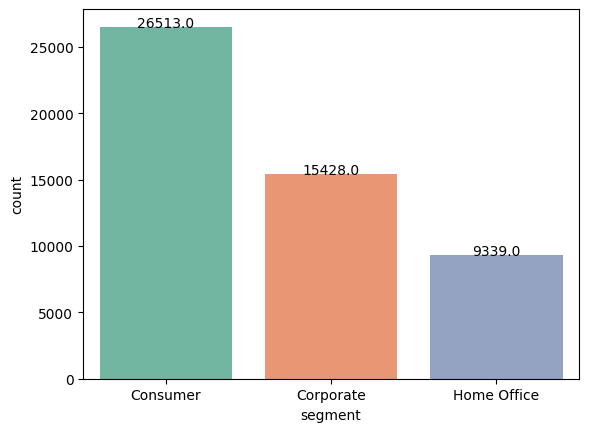

In [474]:

ax = sns.countplot(x='segment', data=df_cleaned, palette='Set2')

# Annotate counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black')
plt.show()


**Business Insight:** The Consumer segment is the most active, suggesting it should be prioritized for marketing


---

## Customer Segmentation Analysis
Consumer is the largest segment with 26,513 customers (approximately 50.6% of the total). 📊

Corporate is the second-largest segment with 15,428 customers (approximately 29.4% of the total). 🏢

Home Office is the smallest segment with 9,339 customers (approximately 17.8% of the total). 🏠

---

In [475]:
df_cleaned['category'].value_counts()


category
Office Supplies    31267
Technology         10140
Furniture           9873
Name: count, dtype: int64

---

### Category Distribution

This barplot displays the number of orders for each product category: Technology, Furniture, and Office Supplies.  
It shows that Office Supplies has the highest order count, followed by Technology and Furniture.  


C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\3302340971.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




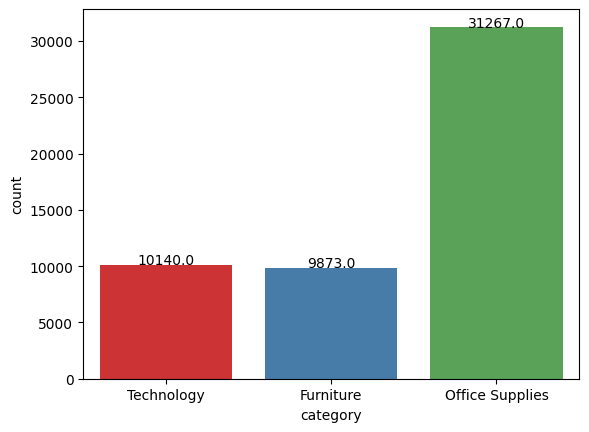

In [476]:

dx = sns.countplot(x='category', data=df_cleaned, palette='Set1')

# Annotate counts
for p in dx.patches:
    dx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black')
plt.show()


**Business Insight:** Office Supplies is the most popular category, indicating a strong demand and potential focus area for inventory.

---



## Product Category Analysis
Office Supplies is the largest category with 31,267 items, representing approximately 60.5% of the total count. 📄

Technology is the second-largest category with 10,140 items, representing approximately 19.6% of the total count. 💻

Furniture is the smallest category with 9,873 items, representing approximately 19.1% of the total count. 🛋️

---

---

### Sales Distribution (Sales < $3000)

This histogram visualizes the distribution of sales amounts for orders below $3000.  
Most orders have low sales values, with a sharp drop-off as the sales amount increases.



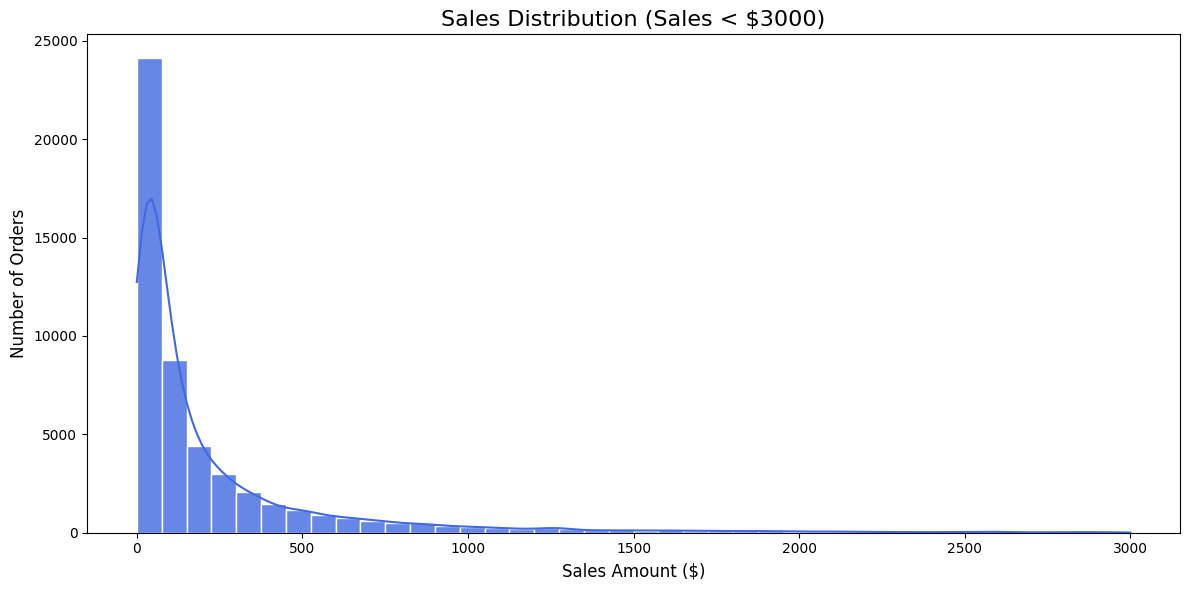

In [477]:
filtered_df = df_cleaned[df_cleaned['sales'] < 3000]

plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_df, x='sales', bins=40, kde=True, color='royalblue', edgecolor='white', alpha=0.8)

plt.title("Sales Distribution (Sales < $3000)", fontsize=16)
plt.xlabel("Sales Amount ($)", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.tight_layout()
plt.show()



**Business Insight:**  
The majority of transactions are for smaller sales amounts, indicating that high-value orders are rare in this

---

---

### Profit Distribution

This boxplot visualizes the distribution of profit values for all orders.  
Most profits are concentrated around zero, with several outliers on both the negative and positive sides.



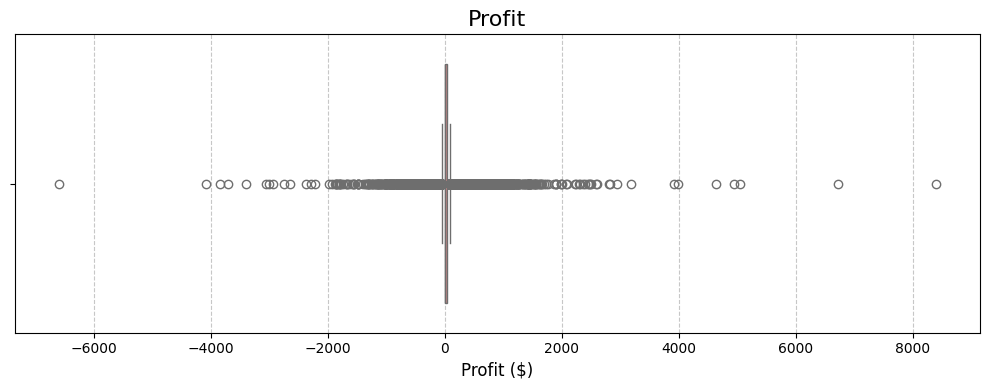

In [478]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_cleaned, x='profit', color='lightcoral')

plt.title("Profit", fontsize=16)
plt.xlabel("Profit ($)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Business Insight:**  
There are many orders with low or negative profit, indicating potential issues with pricing, discounting, or cost management.


---


## Profit & Sales Insights

Profit
The median profit is near $0, indicating that a significant portion of transactions result in little to no profit.

The majority of profits (the central 50%) fall within a narrow range of roughly -$500 to +$500.

The data shows a wide range of outliers, with some transactions resulting in large losses (up to -$6,000) and others generating high profits (over $8,000).

Sales Distribution
The vast majority of sales orders are for small amounts, with the highest frequency occurring at the lowest sales values (under $200).

The number of orders drops off sharply as the sales amount increases, indicating that high-value sales are a small percentage of total transactions.

The distribution is heavily right-skewed, a common pattern where a small number of large transactions likely account for a disproportionately high percentage of total revenue.

---

---

### Discount Distribution in %

This histogram shows the distribution of discount percentages applied to orders.  
Most orders have little or no discount, with a few orders receiving higher discounts.



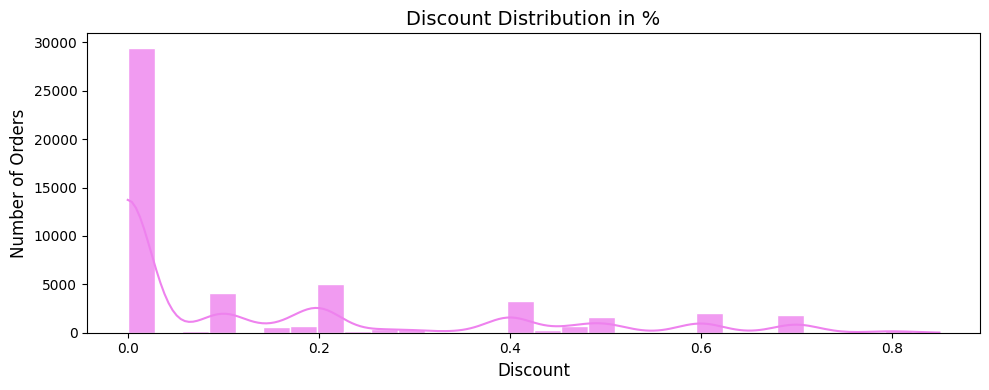

In [479]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df_cleaned, x="discount", bins=30, kde=True, color="violet", edgecolor='white', alpha=0.8)
plt.title("Discount Distribution in %", fontsize=14)
plt.xlabel("Discount", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.tight_layout()
plt.show()


**Business Insight:**  
The majority of sales occur with low or zero discounts, but there are notable spikes at certain discount levels, which may indicate promotional pricing strategies.

---

In [480]:
df_cleaned.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'segment', 'city', 'state', 'country', 'market', 'region', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

---

### Total Sales by Category

This bar chart shows total sales for each product category: Furniture, Office Supplies, and Technology.  
Technology leads with the highest sales, followed by Furniture and Office Supplies.


C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\1790359194.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




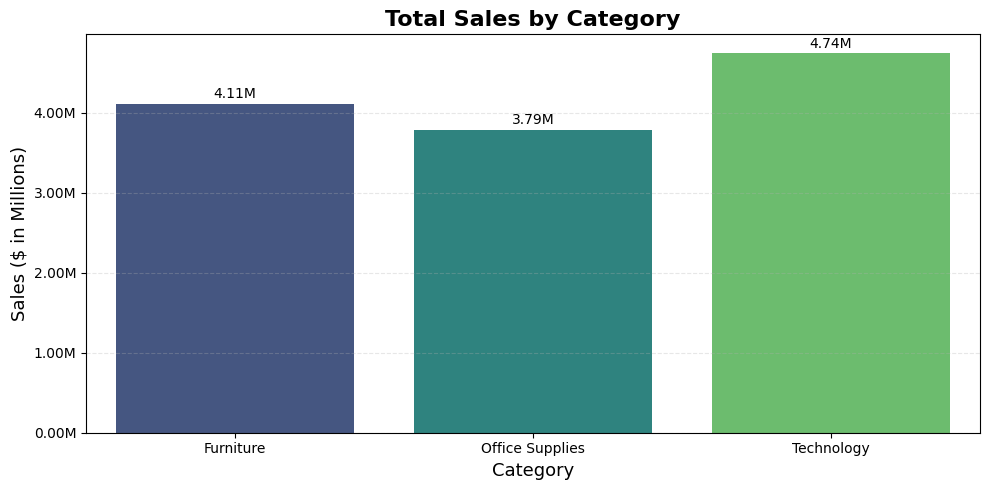

In [481]:

from matplotlib.ticker import FuncFormatter

category_sales = df_cleaned.groupby('category')['sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=category_sales, x='category', y='sales', palette='viridis')

formatter = FuncFormatter(lambda x, _: f'{x / 1_000_000:.2f}M')
ax.yaxis.set_major_formatter(formatter)

for i in ax.containers:
    ax.bar_label(i, labels=[f'{v.get_height()/1_000_000:.2f}M' for v in i], fontsize=10, padding=2)

plt.title("Total Sales by Category", fontsize=16, weight='bold')
plt.xlabel("Category", fontsize=13)
plt.ylabel("Sales ($ in Millions)", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()




**Business Insight**  
Technology products generate the most revenue, indicating strong market demand. Focusing on Technology and maintaining inventory for Furniture can maximize sales growth.


---

---

### Total Sales by Category

This bar chart displays total sales for each product category (sub-category) in thousands of dollars.  
Binders, Storage, Art, and Phones are the top-performing categories, while Tables and Appliances have the lowest sales.



C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\602523901.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




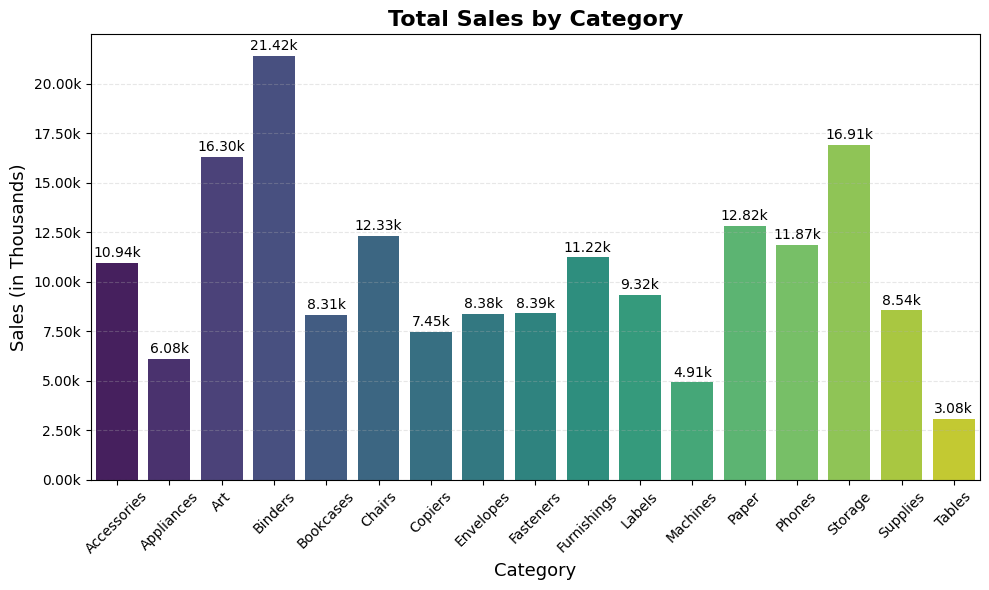

In [482]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sub_quant = df_cleaned.groupby('sub-category')['quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sub_quant, x='sub-category', y='quantity', palette='viridis')

formatter = FuncFormatter(lambda x, _: f'{x / 1_000:.2f}k')
ax.yaxis.set_major_formatter(formatter)

for i in ax.containers:
    ax.bar_label(i, labels=[f'{v.get_height()/1_000:.2f}k' for v in i], fontsize=10, padding=2)

plt.title("Total Sales by Category", fontsize=16, weight='bold')
plt.xlabel("Category", fontsize=13)
plt.ylabel("Sales (in Thousands)", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Business Insight:**  
Sales are distributed unevenly across categories, with Binders and Storage leading. Prioritizing inventory and marketing for high-sales categories can optimize revenue.

---

---

### Discount vs Profit (Point Size: Sales)

This scatter plot visualizes the relationship between discount percentage and profit for each order, with point size representing sales value.  
Higher discounts generally correspond to lower profits, and many high-discount orders result in negative profit.



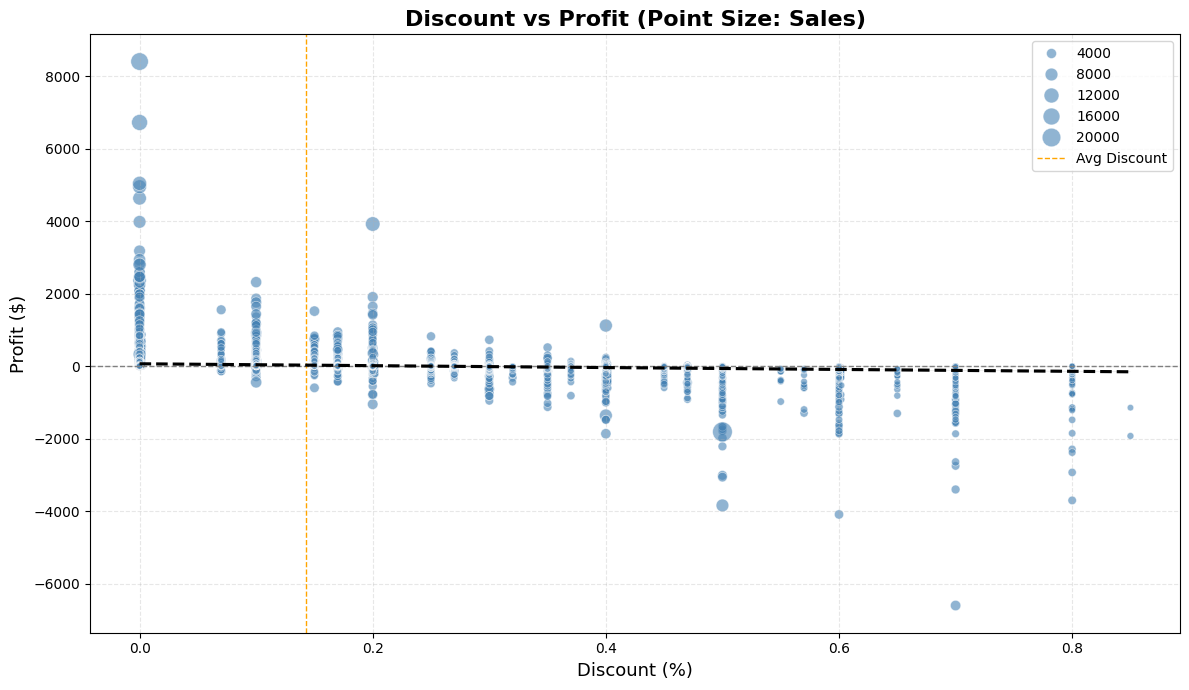

In [483]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Scatter plot
ax = sns.scatterplot(
    data=df_cleaned,
    x='discount',
    y='profit',
    size='sales',
    sizes=(20, 200),
    alpha=0.6,
    color='steelblue',
    edgecolor='white',
    linewidth=0.5
)

# Reference lines
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(df_cleaned['discount'].mean(), color='orange', linestyle='--', linewidth=1, label='Avg Discount')

# Add trendline (optional)
sns.regplot(
    data=df_cleaned,
    x='discount',
    y='profit',
    scatter=False,
    ax=ax,
    color='black',
    line_kws={'linestyle': '--'}
)

# Titles and labels
plt.title("Discount vs Profit (Point Size: Sales)", fontsize=16, weight='bold')
plt.xlabel("Discount (%)", fontsize=13)
plt.ylabel("Profit ($)", fontsize=13)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



**Business Insight:**  
Increasing discounts tends to reduce profitability. Careful management of discount strategies is essential to avoid losses, especially on high-value sales.

---

---

### Correlation Heatmap: Sales, Profit, Discount, Quantity

This heatmap shows the correlation coefficients between key numerical variables: sales, profit, discount, and quantity.  
Sales and profit are positively correlated, while discount has a negative correlation with profit. Quantity has a weak correlation with other variables.



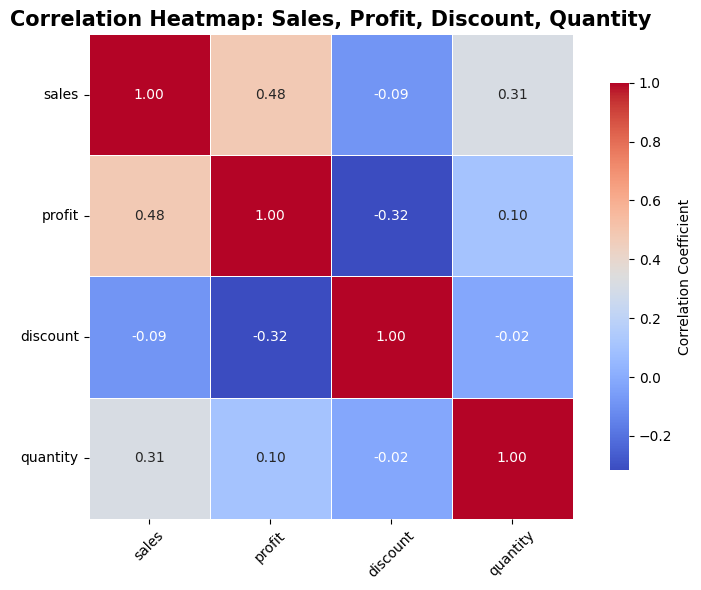

In [484]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only the numerical columns
corr_data = df_cleaned[['sales', 'profit', 'discount', 'quantity']]

# Calculating correlation matrix
corr_matrix = corr_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

plt.title("Correlation Heatmap: Sales, Profit, Discount, Quantity", fontsize=15, weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Business Insight:**  
Higher discounts tend to reduce profit, while increased sales are associated with higher profit. Monitoring these relationships can help optimize pricing and sales strategies.

---

---

### Top 10 Cities by Sales

This bar chart shows the top 10 cities ranked by total sales (in thousands).  
New York City leads by a wide margin, followed by Los Angeles, Manila, and Seattle. Other major cities like San Francisco, Philadelphia, and Sydney also contribute significantly.



C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\2680803652.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




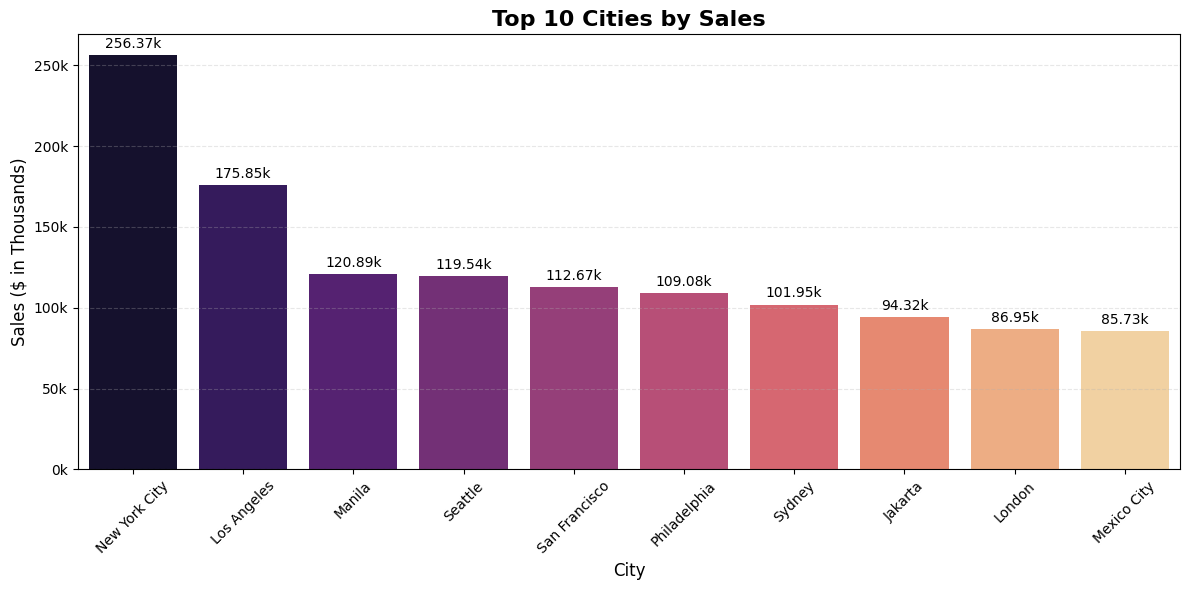

In [485]:
top_cities = df_cleaned.groupby('city')['sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_cities, x='city', y='sales', palette='magma')

# Annotate with values in 'k'
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()/1_000:.2f}k' for v in container], padding=3, fontsize=10)

plt.title("Top 10 Cities by Sales", fontsize=16, weight='bold')
plt.xlabel("City", fontsize=12)
plt.ylabel("Sales ($ in Thousands)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Format y-axis in k
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000:.0f}k'))

plt.tight_layout()
plt.show()



**Business Insight:**  
Sales are highly concentrated in a few metropolitan areas. Focusing marketing and resources on these top cities can maximize revenue growth.

---

---

### Profit by Region

This bar chart displays total profit (in thousands) for each region.  
Central region generates the highest profit, followed by North, North Asia, and South. Regions like Canada and Southeast Asia contribute the least.



C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\1425601893.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




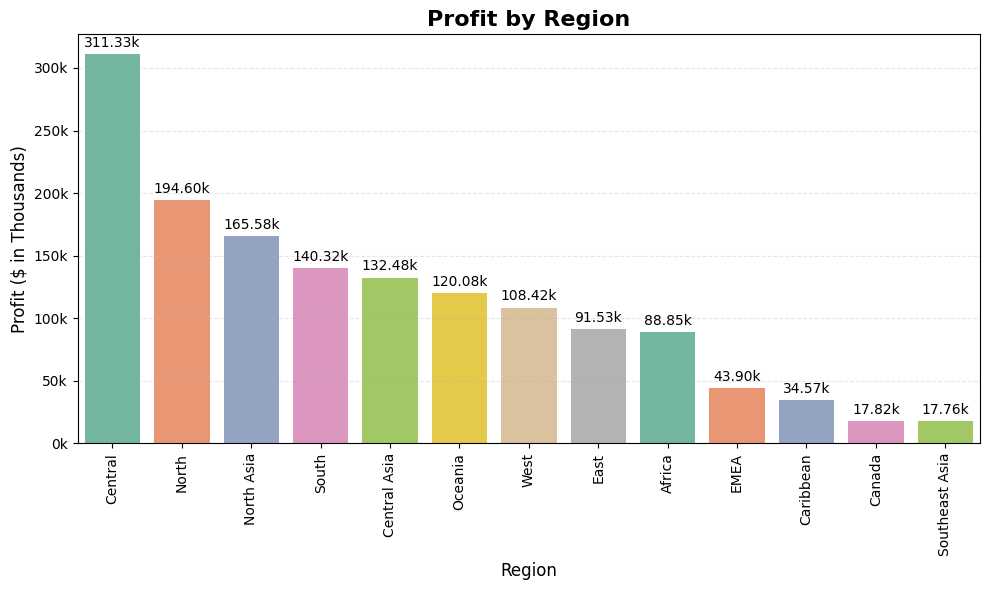

In [486]:

from matplotlib.ticker import FuncFormatter

region_profit = df_cleaned.groupby('region')['profit'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=region_profit, x='region', y='profit', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()/1_000:.2f}k' for v in container], padding=3, fontsize=10)

plt.title("Profit by Region", fontsize=16, weight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Profit ($ in Thousands)", fontsize=12)

plt.xticks(rotation=90) 

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000:.0f}k'))

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**Business Insight:**  
Profitability is concentrated in a few regions. Focusing business strategies and resources on high-profit regions can further enhance overall performance.

---

---

### Sales by Market

This bar chart displays total sales (in thousands) for each market.  
APAC leads with the highest sales, followed by EU, US, and LATAM. EMEA, Africa, and Canada have significantly lower sales.



C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\724330449.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




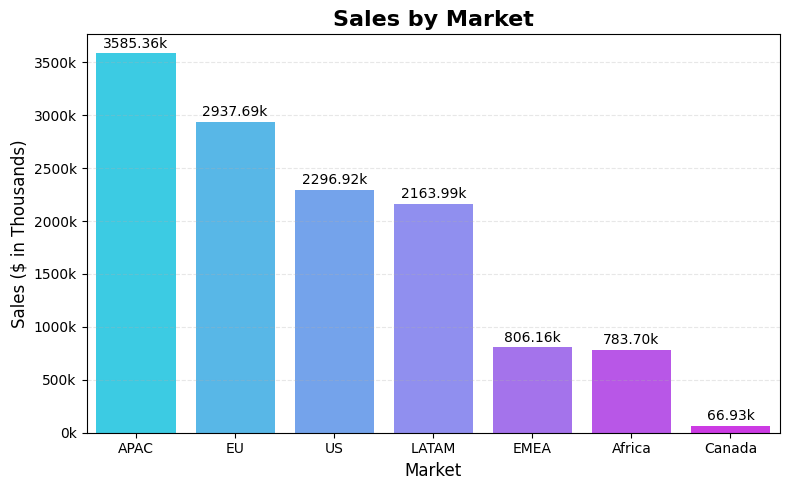

In [487]:
market_sales = df_cleaned.groupby('market')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=market_sales, x='market', y='sales', palette='cool')

for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()/1_000:.2f}k' for v in container], padding=2, fontsize=10)

plt.title("Sales by Market", fontsize=16, weight='bold')
plt.xlabel("Market", fontsize=12)
plt.ylabel("Sales ($ in Thousands)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000:.0f}k'))

plt.tight_layout()
plt.show()



**Business Insight:**  
Sales are heavily concentrated in APAC and EU markets. Prioritizing resources and strategies in these high-performing markets can drive further growth.

---


---

### Top 10 Products by Sales

This horizontal bar chart shows the top 10 products ranked by total sales.  
Smart phones dominate the list, with Apple, Cisco, Motorola, and Nokia models leading in sales, followed by copiers and executive leather armchairs.



C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\193720519.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




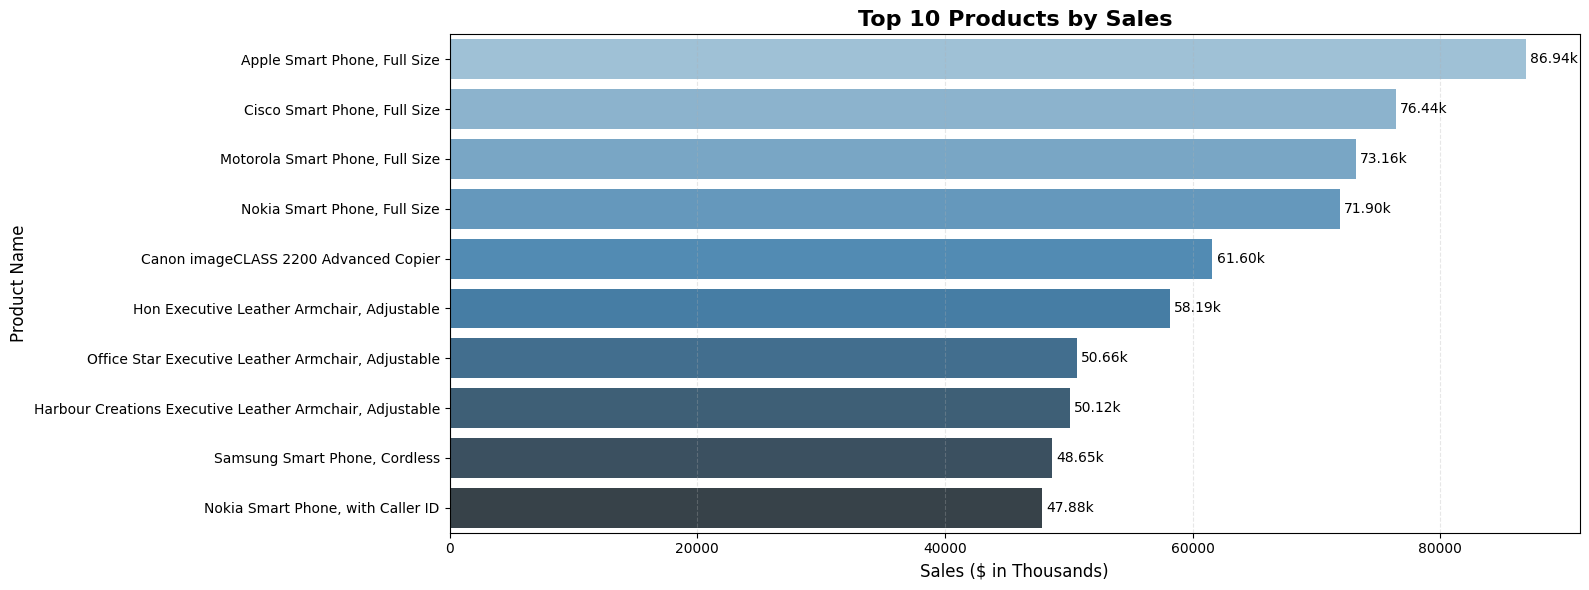

In [488]:
top_products = df_cleaned.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=top_products, x='sales', y='product_name', palette='Blues_d')

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_width()/1_000:.2f}k' for v in container], padding=3, fontsize=10)

plt.title("Top 10 Products by Sales", fontsize=16, weight='bold')
plt.xlabel("Sales ($ in Thousands)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**Business Insight:**  
Sales are highly concentrated among a few technology products, especially smart phones. Focusing on these best-sellers can drive revenue growth and inform inventory decisions.

---

---

### Top 10 Sub-Categories by Profit

This horizontal bar chart displays the top 10 product sub-categories ranked by total profit.  
Copiers and Phones generate the highest profits, followed by Bookcases, Appliances, and Chairs.


C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\2113995070.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




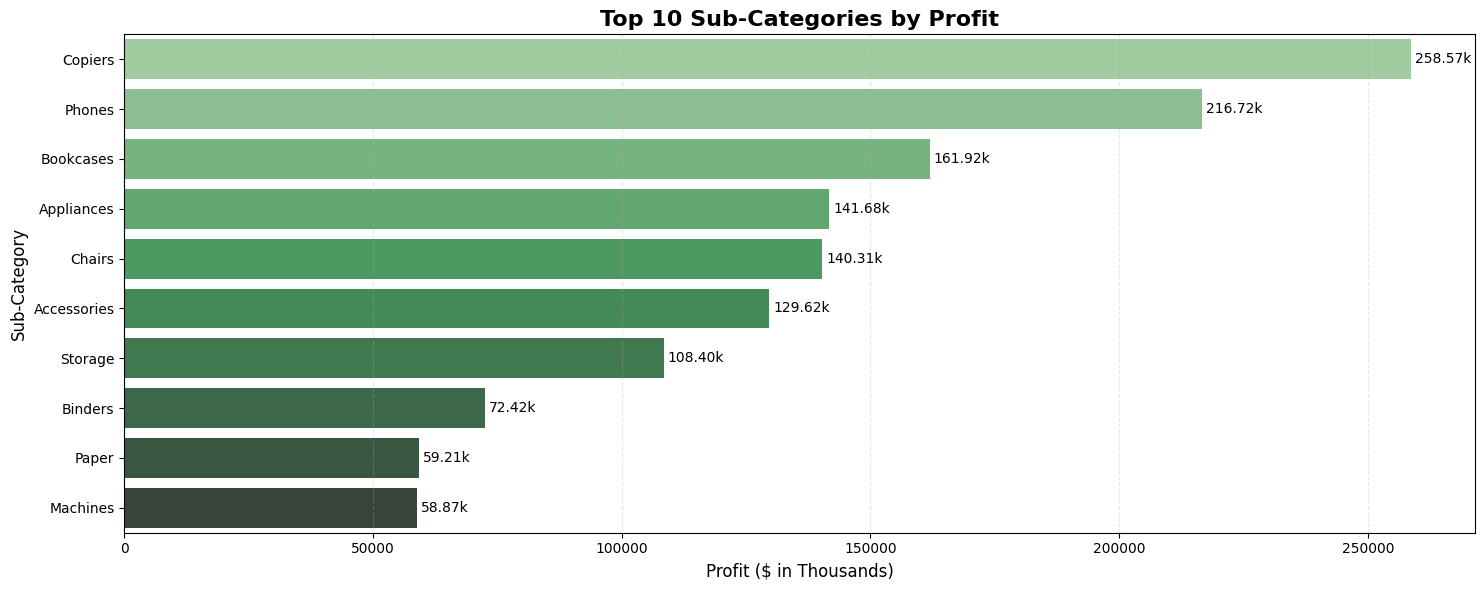

In [492]:
top_subcat_profit = df_cleaned.groupby('sub-category')['profit'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=top_subcat_profit, x='profit', y='sub-category', palette='Greens_d')

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_width()/1_000:.2f}k' for v in container], padding=3, fontsize=10)

plt.title("Top 10 Sub-Categories by Profit", fontsize=16, weight='bold')
plt.xlabel("Profit ($ in Thousands)", fontsize=12)
plt.ylabel("Sub-Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**Business Insight:**  
Profit is concentrated in a few sub-categories, especially Copiers and Phones. Focusing on these high-profit areas can further boost overall profitability.

---

In [502]:

df_cleaned.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'segment', 'city', 'state', 'country', 'market', 'region', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'order_year'],
      dtype='object')

---

### Total Sales by Year

This bar chart displays total sales for each year from 2011 to 2014.  
Sales show a consistent upward trend, increasing each year.


   order_year     sales
0        2011 2,259,154
1        2012 2,676,443
2        2013 3,405,619
3        2014 4,299,532


C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\2491412272.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




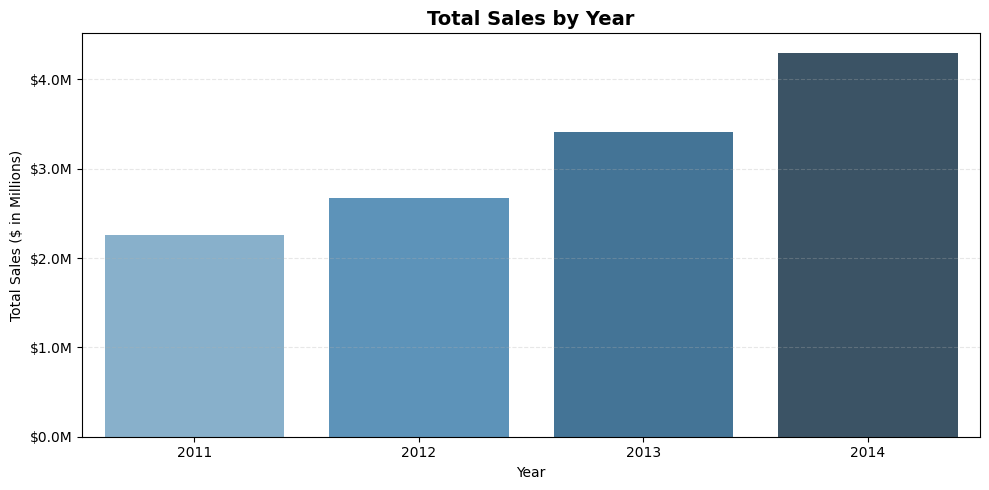

In [542]:
yearly_summary = df_cleaned.groupby('order_year')['sales'].sum().reset_index()

print(yearly_summary)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=yearly_summary, x='order_year', y='sales', palette='Blues_d')

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1_000_000:.1f}M'))

plt.title("Total Sales by Year", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Total Sales ($ in Millions)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Business Insight:**  
The business experienced strong year-over-year growth, with sales nearly doubling from 2011 to 2014. This indicates successful expansion and increasing market demand.

---

In [ ]:
---

### Top 10 Sub-Categories by Profit

This horizontal bar chart displays the top 10 product sub-categories ranked by total profit.  
Copiers and Phones generate the highest profits, followed by Bookcases, Appliances, and Chairs.

**Business Insight:**  
Profit is concentrated in a few sub-categories, especially Copiers and Phones. Focusing on these high-profit areas can further boost

---

### Monthly Sales Trend

This line plot shows total sales for each month throughout the year.  
Sales are lowest in February and July, with peaks in June, August, September, November, and December.



   order_month_name     sales
0           January   675,134
1          February   543,719
2             March   770,501
3             April   698,280
4               May   903,997
5              June 1,269,609
6              July   749,382
7            August 1,293,462
8         September 1,437,380
9           October 1,168,184
10         November 1,550,934
11         December 1,580,166


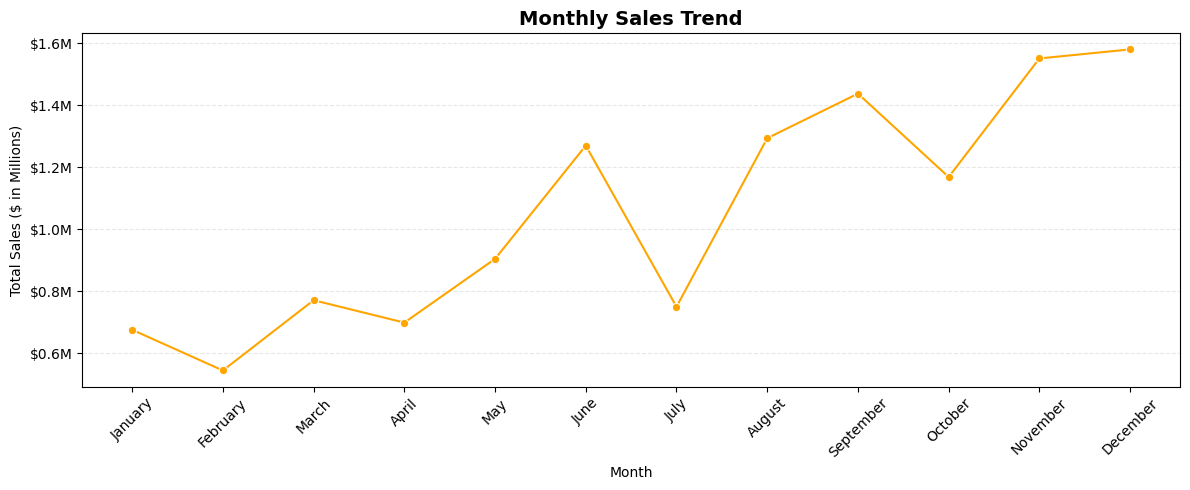

In [545]:

df_cleaned['order_month_name'] = df_cleaned['order_date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_summary = df_cleaned.groupby('order_month_name')['sales'].sum().reindex(month_order).reset_index()
print(monthly_summary.head(12))

plt.figure(figsize=(12, 5))
ax = sns.lineplot(data=monthly_summary, x='order_month_name', y='sales', marker='o', color='orange')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1_000_000:.1f}M'))

plt.title("Monthly Sales Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Total Sales ($ in Millions)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**Business Insight:**  
Sales increase significantly in the second half of the year, especially during holiday and year-end periods. This highlights strong seasonality and suggests opportunities for targeted promotions during peak months.

---

In [514]:
df_cleaned['order_day']=df_cleaned['order_date']

---

### Orders by Day of the Week

This barplot shows the number of orders placed on each day of the week.  
Order volumes are highest on weekdays, especially Friday, and drop significantly on weekends.


C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\1368214792.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




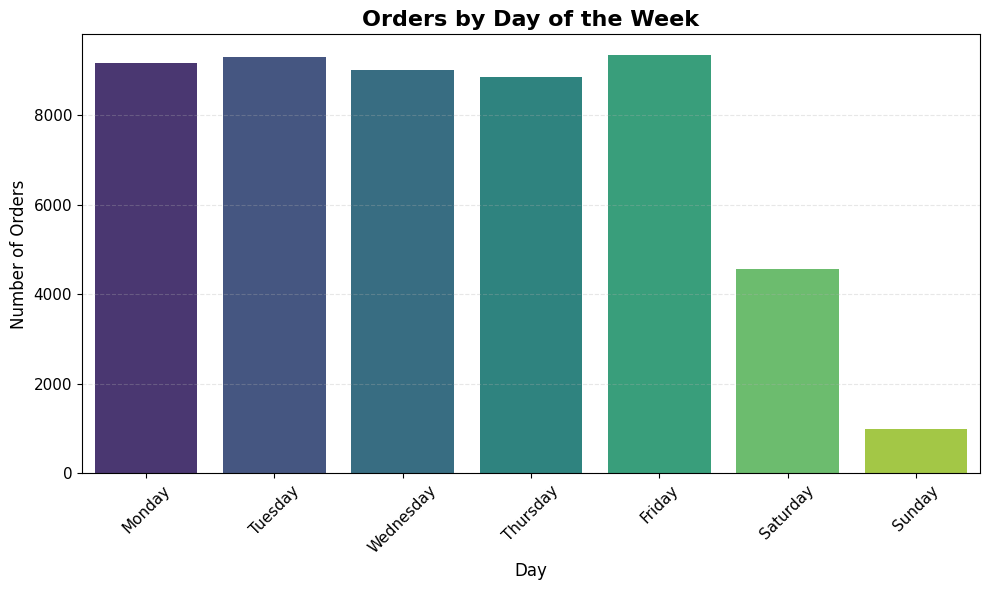

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned['day_name'] = df_cleaned['order_date'].dt.day_name()

daily_orders = df_cleaned['day_name'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_orders.index, y=daily_orders.values, palette='viridis')

plt.title("Orders by Day of the Week", fontsize=16, weight='bold')
plt.xlabel("Day", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**Business Insight:**  
Most orders are placed during the workweek, with Friday being the peak day. Weekend activity is much lower, suggesting business operations and customer engagement are concentrated on weekdays.

---

In [515]:
df_cleaned['profit_margin']=df_cleaned['profit']/df_cleaned['sales']

---

### Distribution of Sales per Unit (< $1500)

This histogram visualizes the distribution of sales per unit for orders below $1500.  
Most orders have low sales per unit values, with a sharp decline as the price increases.


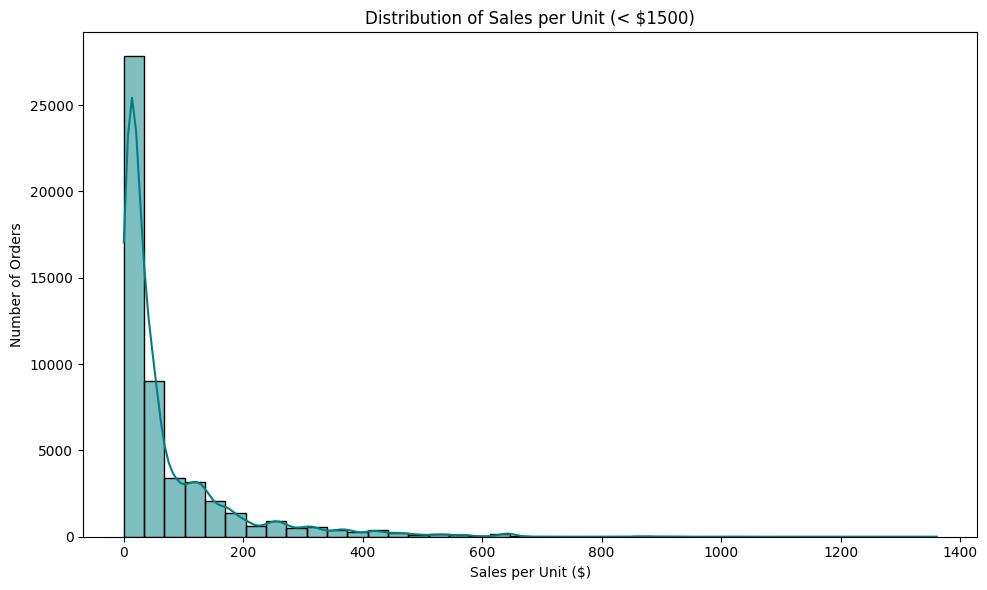

In [530]:
filtered_df = df_cleaned[df_cleaned['sales_per_unit'] < 1400]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['sales_per_unit'], bins=40, kde=True, color='teal')
plt.title("Distribution of Sales per Unit (< $1500)")
plt.xlabel("Sales per Unit ($)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()



**Business Insight:**  
The majority of products are sold at lower price points per unit, indicating that high-priced items are rare and most sales come from affordable products.

---

---

### Shipping Time by Shipping Mode

This boxplot compares the number of days taken to ship orders across different shipping modes.  
Same Day shipping delivers orders almost instantly, while Standard Class takes the longest, typically 4–7 days.  
Second Class and First Class offer intermediate delivery times.


C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\1850301767.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




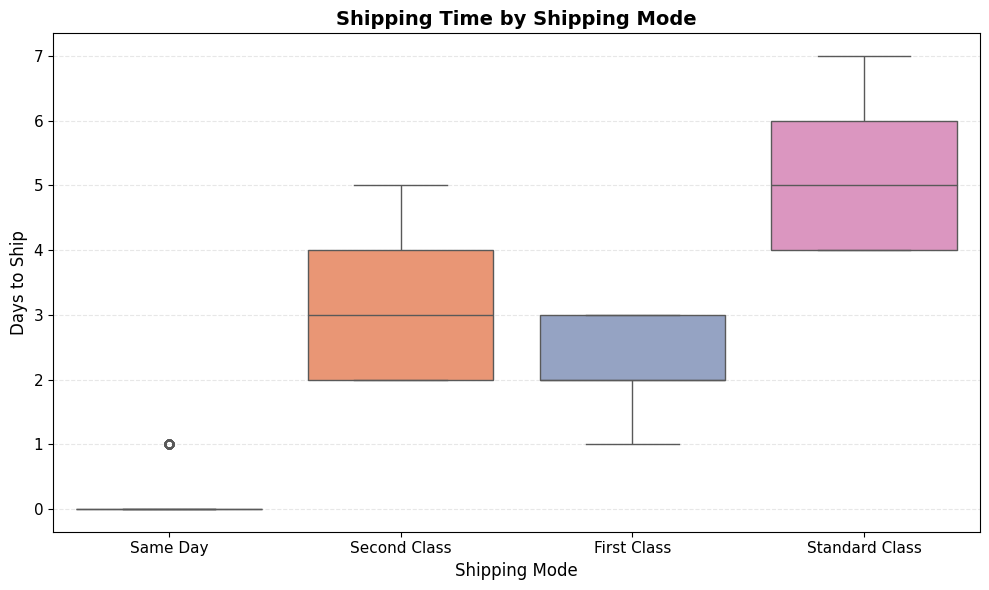

In [535]:
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'])
df_cleaned['ship_date'] = pd.to_datetime(df_cleaned['ship_date'])

df_cleaned['days_to_ship'] = (df_cleaned['ship_date'] - df_cleaned['order_date']).dt.days
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='ship_mode', y='days_to_ship', palette='Set2')

plt.title("Shipping Time by Shipping Mode", fontsize=14, weight='bold')
plt.xlabel("Shipping Mode", fontsize=12)
plt.ylabel("Days to Ship", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



**Business Insight:**  
Faster shipping modes (Same Day, First Class) provide quicker delivery but may involve higher costs. Standard Class is slower but likely more economical.

---


---

### Sales per Unit by Product Category

This boxplot compares the distribution of sales per unit across Technology, Furniture, and Office Supplies categories.  
Technology and Furniture have higher median sales per unit, while Office Supplies tend to have lower values.  
There are several outliers in each category, indicating occasional high-priced items.



C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\3921622894.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




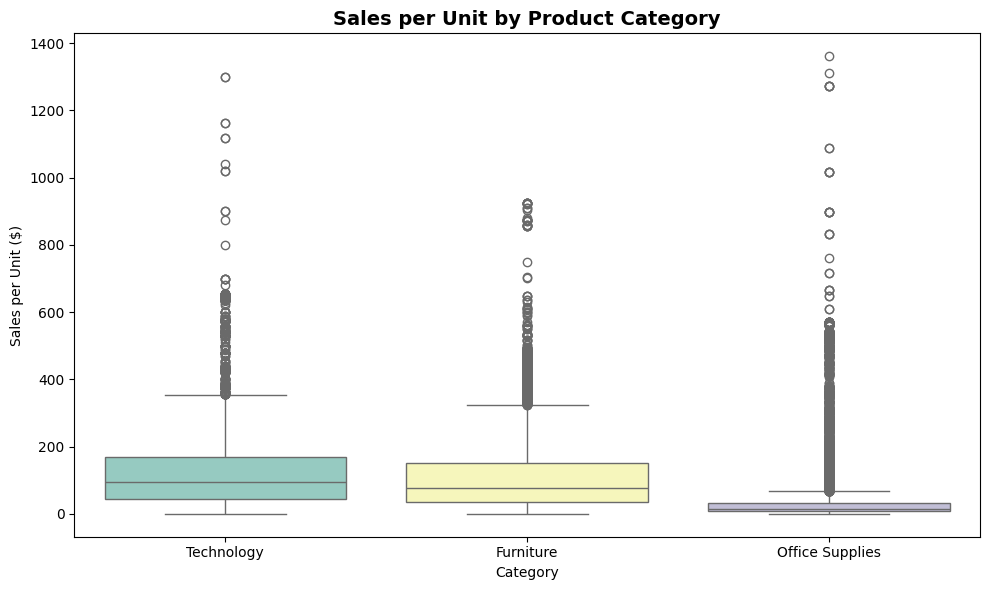

In [546]:
df_cleaned['sales_per_unit']=df_cleaned['sales']/df_cleaned['quantity']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[df_cleaned['sales_per_unit'] < 1500], 
            x='category', y='sales_per_unit', palette='Set3')

plt.title("Sales per Unit by Product Category", fontsize=14, weight='bold')
plt.xlabel("Category")
plt.ylabel("Sales per Unit ($)")
plt.tight_layout()
plt.show()


**Business Insight:**  
Technology and Furniture products generally command higher prices per unit, while Office Supplies are typically lower-priced.

---

---

### High Discount Orders (> 30%)

This bar chart shows the number of orders with discounts greater than 30% compared to those with discounts of 30% or less.  
Most orders receive discounts of 30% or less, while a smaller portion of orders benefit from higher discounts.



C:\Users\Riya\AppData\Local\Temp\ipykernel_8260\4114568428.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




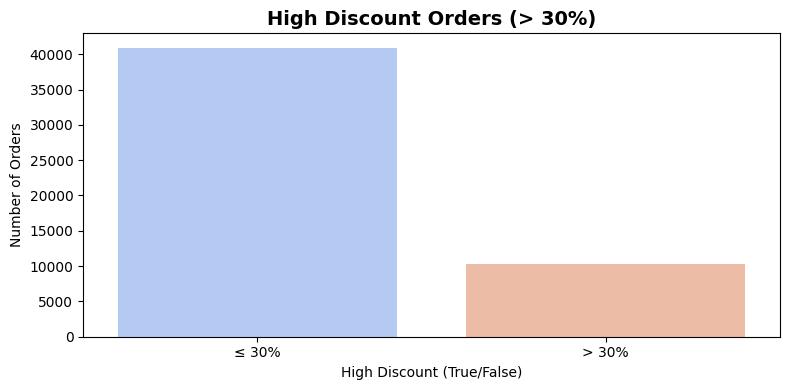

In [554]:
df_cleaned['high_disc_flag']=df_cleaned['discount']>0.3
plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, x='high_disc_flag', palette='coolwarm')

plt.title("High Discount Orders (> 30%)", fontsize=14, weight='bold')
plt.xlabel("High Discount (True/False)")
plt.ylabel("Number of Orders")
plt.xticks([0, 1], ['≤ 30%', '> 30%'])
plt.tight_layout()
plt.show()


**Business Insight:**  
High discount orders are less common, suggesting that deep discounts are used selectively, possibly for promotions.

---

### ✅ Feature Engineering Summary

In this section, we engineered new features from raw columns to extract more meaningful insights. Features like `sales_per_unit` and `profit_margin` provided pricing and profitability patterns, while `days_to_ship` gave operational clarity. Time-based features like `order_month` and `order_year` helped us visualize trends and seasonality. Each was supported with focused visualizations and interpretations to enhance business understanding.
